In [ ]:
#Data Pre-precessing

import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing


source_datafile = '/Users/ziyuanjiang/dstoolbox/datasetkdd/testdata'
handled_datafile = '/Users/ziyuanjiang/dstoolbox/datasetkdd/testdata.csv'

def word2num(x,y):
    return [i for i in range(len(y)) if y[i] == x]


file_data = open(handled_datafile,'w',newline='')
with open(source_datafile,'r') as data_source:
    csv_read = csv.reader(data_source)
    csv_write = csv.writer(file_data)
    for row in csv_read:
        temp = np.array(row)

        #Protocol
        protocol_list = ['tcp','udp','icmp']
        if temp[1] in protocol_list:
            temp[1] = word2num(temp[1],protocol_list)[0]

        #Service
        service_list = ['aol','auth','bgp','courier','csnet_ns','ctf','daytime','discard','domain','domain_u',
                 'echo','eco_i','ecr_i','efs','exec','finger','ftp','ftp_data','gopher','harvest','hostnames',
                 'http','http_2784','http_443','http_8001','imap4','IRC','iso_tsap','klogin','kshell','ldap',
                 'link','login','mtp','name','netbios_dgm','netbios_ns','netbios_ssn','netstat','nnsp','nntp',
                 'ntp_u','other','pm_dump','pop_2','pop_3','printer','private','red_i','remote_job','rje','shell',
                 'smtp','sql_net','ssh','sunrpc','supdup','systat','telnet','tftp_u','tim_i','time','urh_i','urp_i',
                 'uucp','uucp_path','vmnet','whois','X11','Z39_50']
        if temp[2] in service_list:
            temp[2] = word2num(temp[2],service_list)[0]
        
        #Flag
        flag_list = ['OTH','REJ','RSTO','RSTOS0','RSTR','S0','S1','S2','S3','SF','SH']
        if temp[3] in flag_list:
            temp[3] = word2num(temp[3],flag_list)[0]

        #State
        if(temp[41] == 'normal.'):
            temp[41] = 1
        else:
            temp[41] = 0

        csv_write.writerow(temp)
    file_data.close()

In [24]:
#One-Hot Encoding
from sklearn import preprocessing
import numpy as np

file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/testdata.csv'
with open(file) as file_op:
    data_matrix = np.loadtxt(file_op, delimiter=",")

enc = preprocessing.OneHotEncoder()
enc.fit(data_matrix[:,[1,2,3]])
en_matrix = np.zeros((len(data_matrix),80))

for i in range(len(data_matrix)):
    en_temp = enc.transform([data_matrix[i,[1,2,3]]]).toarray()
    en_matrix[i,:] = en_temp

np.savetxt('/Users/ziyuanjiang/dstoolbox/datasetkdd/onehotdata.csv',en_matrix.astype(int),delimiter=',',fmt='%.0f')

In [26]:
file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/corrected.csv'
with open(file) as file_op:
    data_matrix = np.loadtxt(file_op, delimiter=",")

en_matrix = np.zeros((len(data_matrix),80))

for i in range(len(data_matrix)):
    en_temp = enc.transform([data_matrix[i,[1,2,3]]]).toarray()
    en_matrix[i,:] = en_temp

np.savetxt('/Users/ziyuanjiang/dstoolbox/datasetkdd/coronehotdata.csv',en_matrix.astype(int),delimiter=',',fmt='%.0f')

In [27]:
#Loading and dividing datasets
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/coronehotdata.csv'
with open(file) as file_op:
    encoded_matrix = np.loadtxt(file_op, delimiter=",")

file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/corrected.csv'
with open(file) as file_op:
    data_matrix = np.loadtxt(file_op, delimiter=",")

data_fin = np.hstack((encoded_matrix,np.delete(data_matrix,[1,2,3],axis=1)))

In [28]:
np.savetxt('/Users/ziyuanjiang/dstoolbox/datasetkdd/corfin.csv',data_fin.astype(int),delimiter=',',fmt='%.0f')

In [30]:
from sklearn import preprocessing
import pandas as pd

min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(data_fin)
    
train, test = train_test_split(x_minmax, test_size=0.3)    

In [31]:
test_data = np.delete(test,[118],axis=1)
test_target = test[:,118]
result = clf.predict(test_data)

print (sum(result==test_target)) 

86546


In [3]:
#Loading and dividing datasets
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/onehotdata.csv'
with open(file) as file_op:
    encoded_matrix = np.loadtxt(file_op, delimiter=",")

file = '/Users/ziyuanjiang/dstoolbox/datasetkdd/testdata.csv'
with open(file) as file_op:
    data_matrix = np.loadtxt(file_op, delimiter=",")

data_fin = np.hstack((encoded_matrix,np.delete(data_matrix,[1,2,3],axis=1)))



In [7]:
from sklearn import preprocessing
import pandas as pd

min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(data_fin)
    
train, test = train_test_split(x_minmax, test_size=0.3)    

148098
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118950
         1.0       1.00      1.00      1.00     29257

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



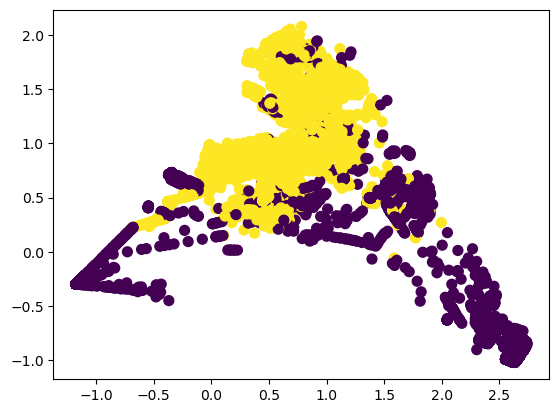

In [14]:
#kNN 
import os
import csv
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import neighbors

train_data = np.delete(train,[118],axis=1)
train_target = train[:,118]

test_data = np.delete(test,[118],axis=1)
test_target = test[:,118]

clf = neighbors.KNeighborsClassifier()

clf.fit(train_data, train_target)

result = clf.predict(test_data)


print (sum(result==test_target)) 

print(metrics.classification_report(test_target, result)) 


pca = PCA(n_components=2)

newData = pca.fit_transform(test_data)

plt.figure()

plt.scatter(newData[:,0], newData[:,1], c=test_target, s=50)

plt.show()

In [17]:
print (sum(result==test_target))
print(result==test_target)

148098
[ True  True  True ...  True  True  True]
